In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df=pd.read_excel('Data.xlsx')
df.drop(df.columns[[0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12]],inplace=True,axis=1)
df.dropna(axis=1, inplace=True)
df.head()

,ID_litter,sex,group,breed_size,Breed,Litter_size,Dead,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,10L,M,EL,S,Poodle,1,1,0,0,223,8.412161,6
1,11L,M,OO,S,Lhasa Apso,6,0,1,0,167,6.001322,3
2,11L,F,OL,S,Lhasa Apso,6,0,1,0,165,6.001322,3
3,11L,F,OO,S,Lhasa Apso,6,1,0,0,182,6.001322,3
4,11L,F,OL,S,Lhasa Apso,6,1,0,0,178,6.001322,3


In [77]:
first_column = df.pop('Dead') 
df.insert(0, 'Dead', first_column) 
df.head()

,Dead,ID_litter,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,1,10L,M,EL,S,Poodle,1,0,0,223,8.412161,6
1,0,11L,M,OO,S,Lhasa Apso,6,1,0,167,6.001322,3
2,0,11L,F,OL,S,Lhasa Apso,6,1,0,165,6.001322,3
3,1,11L,F,OO,S,Lhasa Apso,6,0,0,182,6.001322,3
4,1,11L,F,OL,S,Lhasa Apso,6,0,0,178,6.001322,3


In [78]:
df['ID_litter']=pd.Categorical(df['ID_litter'],ordered=False)
df['sex']=pd.Categorical(df['sex'],ordered=False)
df['group']=pd.Categorical(df['group'],ordered=False)
df['breed_size']=pd.Categorical(df['breed_size'],ordered=False)
df['Breed']=pd.Categorical(df['Breed'],ordered=False)

In [79]:
# Chiots de petite race
df_S = df[df['breed_size']=='S']
# Chiots de grande race
df_L = df[df['breed_size']=='L']

## weight_D1

Text(0.5, 1.0, 'Chiots de race de petite taille morts et vivants suivant leur poids à la naissance')

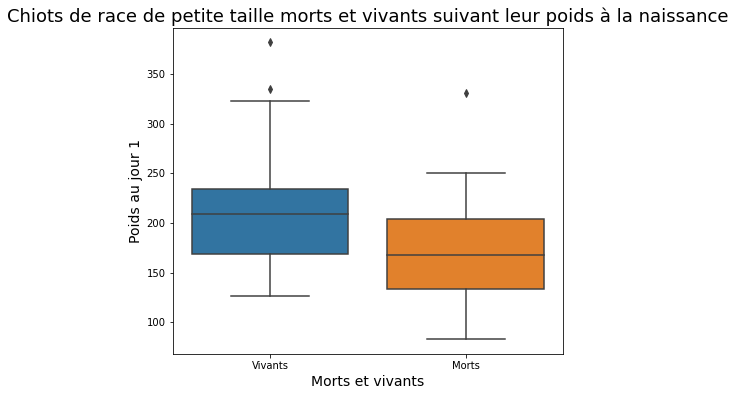

In [125]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='weight_D1', 
            data=df_S) 
plt.ylabel("Poids au jour 1", size=14) 
plt.xlabel("Morts et vivants", size=14)
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots de race de petite taille morts et vivants suivant leur poids à la naissance", size=18)

Text(0.5, 1.0, 'Chiots de race de grande taille morts et vivants suivant leur poids à la naissance')

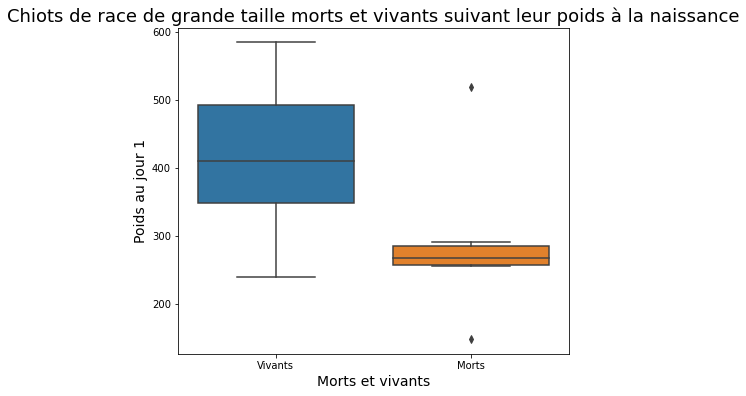

In [126]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='weight_D1', 
            data=df_L) 
plt.ylabel("Poids au jour 1", size=14) 
plt.xlabel("Morts et vivants", size=14)
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots de race de grande taille morts et vivants suivant leur poids à la naissance", size=18)

Text(0.5, 1.0, 'Chiots de race de grande taille morts et vivants suivant leur poids à la naissance')

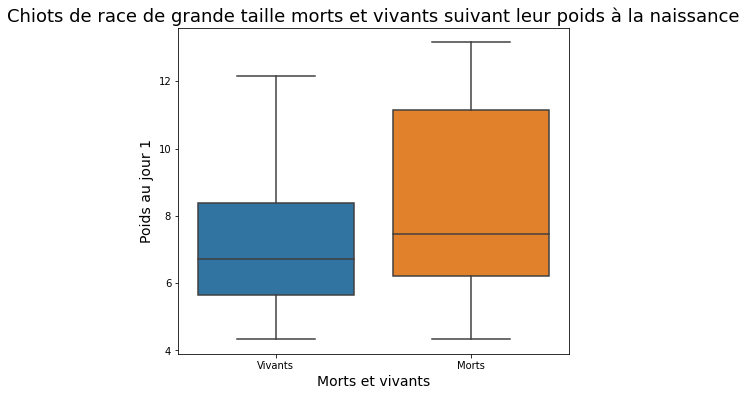

In [82]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='IgG_dam', 
            data=df) 
plt.ylabel("Poids au jour 1", size=14) 
plt.xlabel("Morts et vivants", size=14)
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots de race de grande taille morts et vivants suivant leur poids à la naissance", size=18)

## age_dam

Text(0.5, 1.0, "Chiots de race de petite taille morts et vivants suivant l'âge de leur mère'")

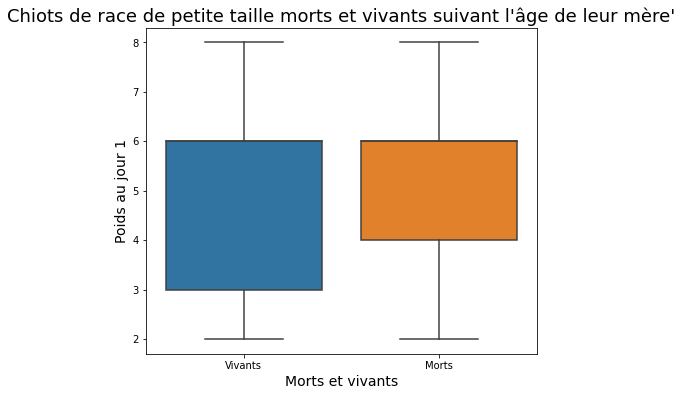

In [83]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='age_dam', 
            data=df_S) 
plt.ylabel("Poids au jour 1", size=14) 
plt.xlabel("Morts et vivants", size=14)
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots de race de petite taille morts et vivants suivant l'âge de leur mère'", size=18)

Text(0.5, 1.0, "Chiots de race de grande taille morts et vivants suivant l'âge de leur mère'")

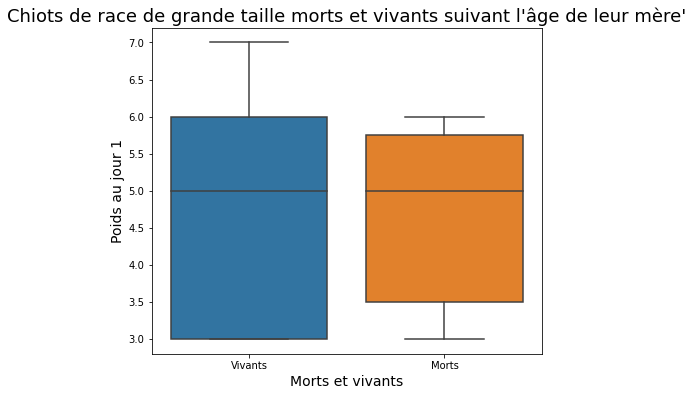

In [84]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='age_dam', 
            data=df_L) 
plt.ylabel("Poids au jour 1", size=14) 
plt.xlabel("Morts et vivants", size=14)
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots de race de grande taille morts et vivants suivant l'âge de leur mère'", size=18)

Text(0.5, 1.0, "Chiots morts et vivants suivant l'âge de leur mère'")

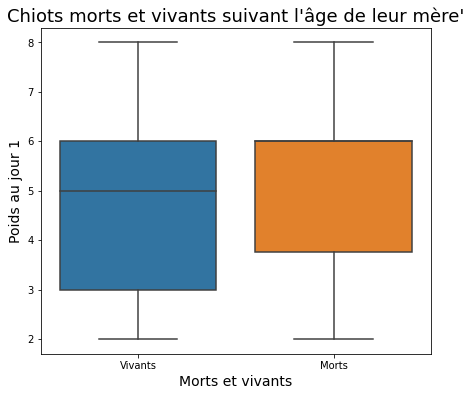

In [85]:
plt.figure(figsize=(7, 6)) 
sns.boxplot(x='Dead', 
            y='age_dam', 
            data=df) 
plt.ylabel("Poids au jour 1", size=14) 
plt.xlabel("Morts et vivants", size=14)
plt.xticks(np.arange(2), ['Vivants', 'Morts'])
plt.title("Chiots morts et vivants suivant l'âge de leur mère'", size=18)

## Diarr_1m

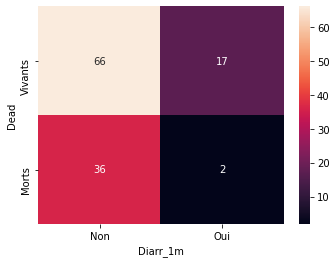

In [89]:
mat_conf = confusion_matrix(df_S['Dead'], df_S['Diarr_1m']) 
mat_conf_df = pd.DataFrame(mat_conf,
                     index = ['Vivants','Morts'], 
                     columns = ['Non','Oui'])

plt.figure(figsize=(5.5,4))
sns.heatmap(mat_conf_df, annot=True)
plt.ylabel('Dead')
plt.xlabel('Diarr_1m')
plt.show()

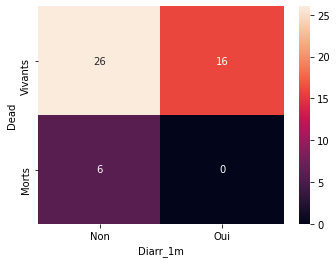

In [90]:
mat_conf = confusion_matrix(df_L['Dead'], df_L['Diarr_1m']) 
mat_conf_df = pd.DataFrame(mat_conf,
                     index = ['Vivants','Morts'], 
                     columns = ['Non','Oui'])

plt.figure(figsize=(5.5,4))
sns.heatmap(mat_conf_df, annot=True)
plt.ylabel('Dead')
plt.xlabel('Diarr_1m')
plt.show()

## Diarr_2m

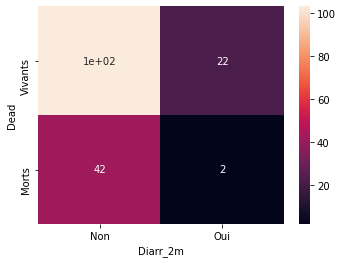

In [124]:
mat_conf = confusion_matrix(df['Dead'], df['Diarr_2m']) 
mat_conf_df = pd.DataFrame(mat_conf,
                     index = ['Vivants','Morts'], 
                     columns = ['Non','Oui'])

plt.figure(figsize=(5.5,4))
sns.heatmap(mat_conf_df, annot=True)
plt.ylabel('Dead')
plt.xlabel('Diarr_2m')
plt.show()

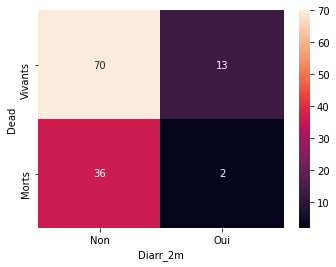

In [123]:
mat_conf = confusion_matrix(df_S['Dead'], df_S['Diarr_2m']) 
mat_conf_df = pd.DataFrame(mat_conf,
                     index = ['Vivants','Morts'], 
                     columns = ['Non','Oui'])

plt.figure(figsize=(5.5,4))
sns.heatmap(mat_conf_df, annot=True)
plt.ylabel('Dead')
plt.xlabel('Diarr_2m')
plt.show()

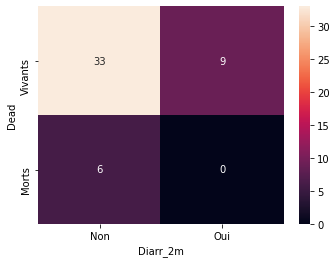

In [121]:
mat_conf = confusion_matrix(df_L['Dead'], df_L['Diarr_2m']) 
mat_conf_df = pd.DataFrame(mat_conf,
                     index = ['Vivants','Morts'], 
                     columns = ['Non','Oui'])

plt.figure(figsize=(5.5,4))
sns.heatmap(mat_conf_df, annot=True)
plt.ylabel('Dead')
plt.xlabel('Diarr_2m')
plt.show()